Pittsburgh is known for its unique topography, with steep hills and rolling terrain defining much of the city's character. While biking is popular here, the slope of the terrain can significantly affect the riding experience. Steep inclines can be a challenge for many cyclists, especially those commuting to get off work or for leisure cycling, while flatter areas provide a more convenient and enjoyable experience. By focusing on analyzing the distribution of slopes in Pittsburgh neighborhoods, my goal was to identify the areas most suitable for biking.

In [55]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [13]:
import os
print(os.getcwd())

C:\Users\jojo1\Data-Visualization


I have successfully loaded the data and displayed the first 15 rows.

In [59]:
df = pd.read_csv('city_traffic_signs.csv')
df.columns = [col.replace('_', ' ').title() for col in df.columns]
df.head(15)

,Id,Id,Mutcd Code,Address Number,Street,City,Mounting Fixture,Date Installed,Description,Neighborhood,Council District,Ward,Tract,Public Works Division,Pli Division,Police Zone,Fire Zone,Latitude,Longitude
0,1,1673225887,R1-1,900,California Ave,Pittsburgh,Wood Pole,NaN,Stop,California-Kirkbride,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-9,40.459325,-80.019057
1,2,668379452,R1-1,107,Glenbury St,Pittsburgh,Channel,NaN,Stop,Overbrook,4.0,32.0,4.200332e+10,5.0,32.0,3.0,4-25,40.386955,-80.002161
2,3,174468442,R1-1,5325,Forbes Ave,Pittsburgh,Wood Pole,NaN,Stop,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-8,40.439828,-79.934814
3,4,1517107112,R1-1,1437,N St Clair St,Pittsburgh,Channel,NaN,Stop,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478685,-79.919270
4,5,1374142598,WF,228,Isabella St,Pittsburgh,Metal Pole,1995-02-14,Wayfinding Signage,North Shore,1.0,22.0,4.200356e+10,6.0,22.0,1.0,1-20,40.448482,-80.000671
5,6,283941710,WF,1010,Middle St,Pittsburgh,Metal Pole,1995-02-08,Wayfinding Signage,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.456659,-79.999908
6,7,1858577624,WF,1107,Sherman Ave,Pittsburgh,Metal Pole,1995-03-22,Wayfinding Signage,Central Northside,1.0,22.0,4.200322e+10,1.0,22.0,1.0,1-21,40.454961,-80.009709
7,8,1338013353,WF,1010,Middle St,Pittsburgh,Wood Pole,1996-05-09,Wayfinding Signage,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.456723,-79.999692
8,9,208075892,WF,500,E North Ave,Pittsburgh,Wood Pole,1994-09-21,Wayfinding Signage,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.456514,-80.001359
9,10,565974481,R1-1,1434,N St Clair St,Pittsburgh,Wood Pole,NaN,Stop,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478543,-79.919190


We can use stop signs to determine which places are suitable for cycling. If there are many stop signs in a community, it means that the speed of cars there is also slow, so it will be safer.

To study the distribution of stop signs in the Pittsburgh area, we can filter the dataset for specific MUTCD codes that represent stop signs (e.g., R1-1) and count their occurrences. By visualizing the data using a pie chart, we can clearly see the proportion of stop signs relative to other signs.

I identified different traffic signs by using MUTCD codes, but these codes are not intuitive to most people. To make the analysis easier to understand, I mapped these codes to more understandable names, such as "Stop Sign" or "Speed ​​Limit".

Index([' Id', 'Id', 'Mutcd Code', 'Address Number', 'Street', 'City',
       'Mounting Fixture', 'Date Installed', 'Description', 'Neighborhood',
       'Council District', 'Ward', 'Tract', 'Public Works Division',
       'Pli Division', 'Police Zone', 'Fire Zone', 'Latitude', 'Longitude'],
      dtype='object')


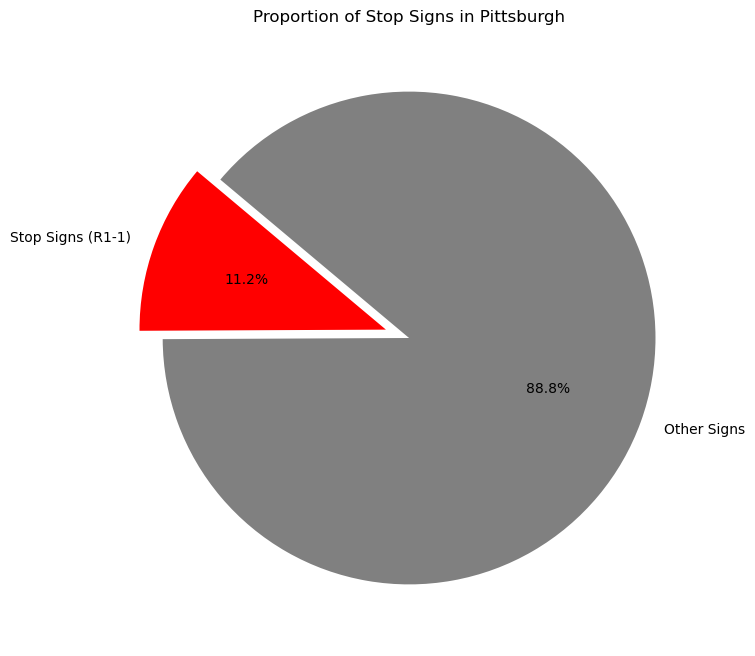

In [66]:
print(df.columns)
stop_signs = df[df['Mutcd Code'] == 'R1-1']

# Count stop signs and other signs
stop_sign_count = len(stop_signs)
total_sign_count = len(df)
other_sign_count = total_sign_count - stop_sign_count

# Create data for the pie chart
labels = ['Stop Signs (R1-1)', 'Other Signs']
sizes = [stop_sign_count, other_sign_count]
colors = ['red', 'gray']
explode = (0.1, 0)  # Highlight stop signs

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Proportion of Stop Signs in Pittsburgh')
plt.show()

The proportion of stop signs does not seem to be that high in the overall picture.

Next, I need to find the distribution data and location information of stop signs in the Pittsburgh area. This data is very important for analyzing traffic flow and cycling friendliness. By knowing the location and number of traffic lights, I can further evaluate which areas have busier traffic, and then I will sort them.

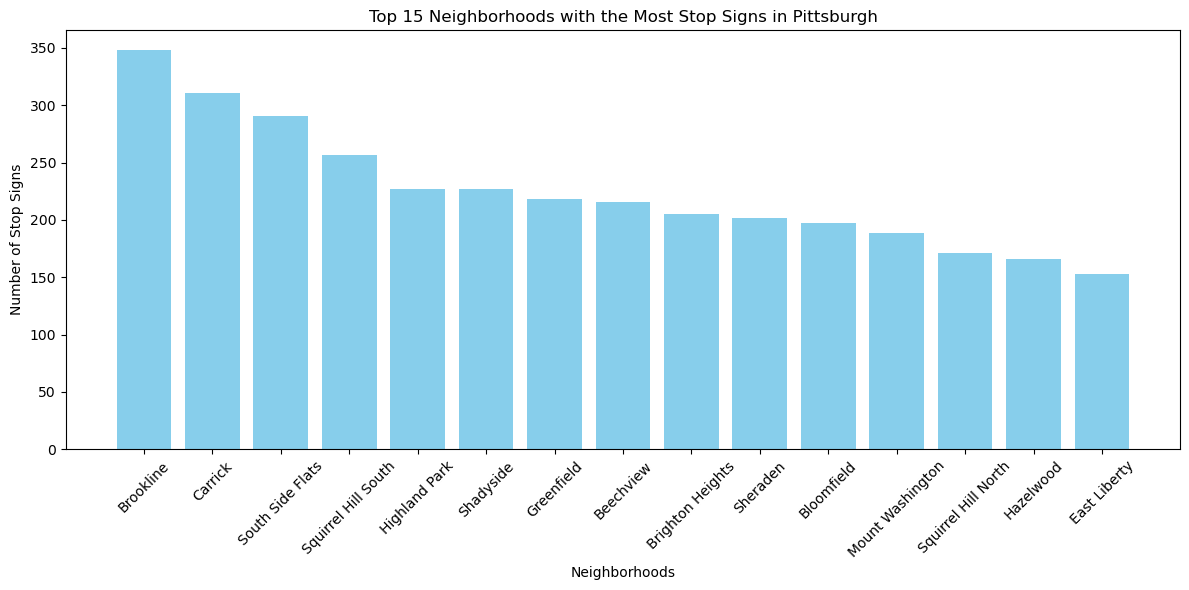

In [77]:
stop_signs = df[df['Mutcd Code'] == 'R1-1']  # Adjust 'Mutcd Code' to match your actual column name

# Group by Neighborhoods and count stop signs
stop_signs_by_neighborhood = stop_signs.groupby('Neighborhood').size().reset_index(name='Stop Sign Count')

# Sort by stop sign count and take the top 15 neighborhoods
top_15_neighborhood = stop_signs_by_neighborhood.sort_values(by='Stop Sign Count', ascending=False).head(15)

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_15_neighborhood['Neighborhood'], top_15_neighborhood['Stop Sign Count'], color='skyblue')
plt.xlabel('Neighborhoods')
plt.ylabel('Number of Stop Signs')
plt.title('Top 15 Neighborhoods with the Most Stop Signs in Pittsburgh')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The bar chart highlights the top 15 neighborhoods in Pittsburgh with the highest number of stop signs, with areas like Brookline, Carrick, and South Side Flats leading the list. Neighborhoods with a higher number of stop signs tend to have slower-moving traffic, as vehicles are required to stop more frequently. This naturally creates a safer and more controlled environment, making these areas potentially more bike-friendly. Slower traffic reduces the risk of accidents and enhances the overall biking experience, which is crucial for both recreational cyclists and commuters. Based on this analysis, neighborhoods with more stop signs, such as Brookline and Carrick, can be considered some of the best areas for biking in Pittsburgh. 